## Setting Up

In [1]:
home_dir = normalizePath("~")
relative_path = file.path("R programs")
full_path = file.path(home_dir, relative_path)
setwd(full_path)
getwd()

[1] "C:/Users/death-star/Documents/R programs"

## Sentiment problem
### High sentiment referes to bullish mindset of Investors


* Data visualizaton
* Training the model
* Testing the model 
* Evaluate out-of-sample performance model

**ABC** case study problem

In [2]:
library(car)
library(lmtest)
library(readxl)
library(sandwich)
library(moments)
library(lubridate)

Loading required package: carData

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [3]:
Data = read_excel('week_5/ABC.xlsx')
head(Data)
dim(Data)


Date,Price,ABC,Sensex,DividendAnnounced,Sentiment,Nifty
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-03,718.15,0.07992481,0.073772129,0,0.04893645,0.095816410
2000-01-04,712.90,-0.00731045,0.021562349,0,-0.05503706,0.009706008
2000-01-05,730.00,0.02398653,-0.024405346,0,0.01913459,-0.032213609
2000-01-06,788.35,0.07993151,0.012045921,0,0.08035507,0.011204936
2000-01-07,851.40,0.07997717,-0.001300371,0,0.09403754,-0.000397248
2000-01-10,919.50,0.07998591,0.019191132,1,0.01522908,0.030167565


[1] 5153    7

In [4]:
class(Data$Date)

[1] "POSIXct" "POSIXt"

Converting this POSIX to normal date variable

In [5]:
Data$Date = as.Date(Data$Date)
class(Data$Date)

[1] "Date"

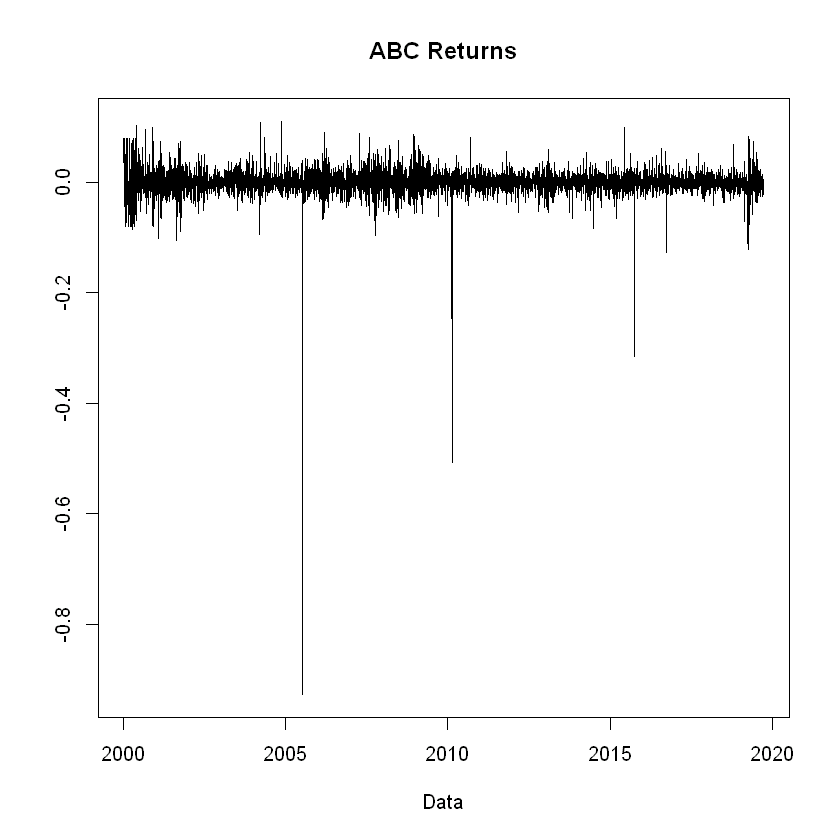

In [6]:
plot(Data$Date, Data$ABC , xlab="Data", ylab = "", main = "ABC Returns", type = 'l')

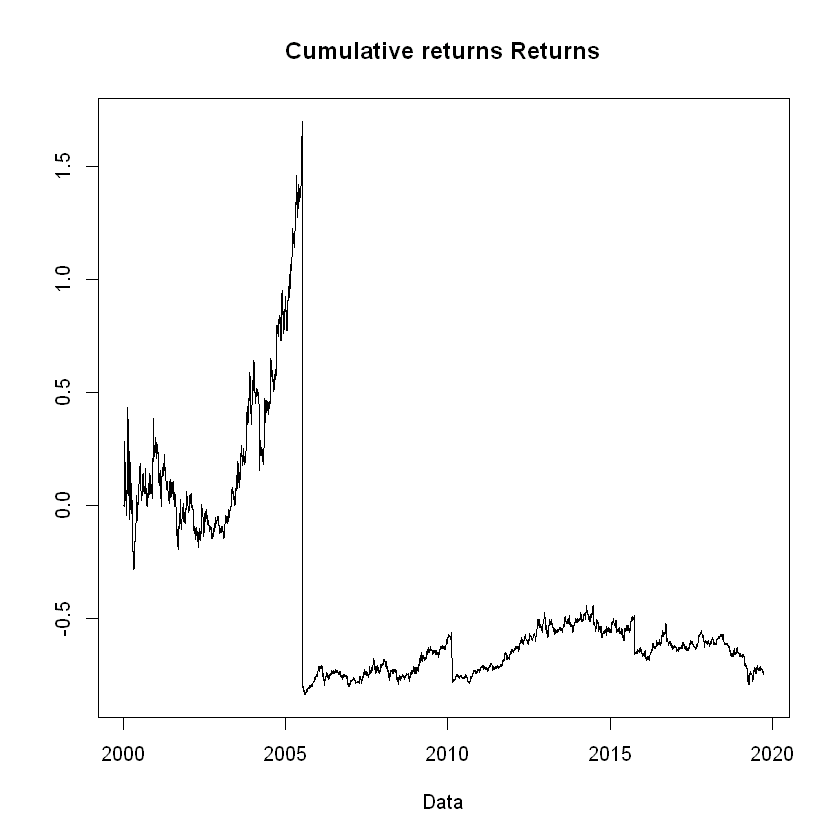

In [7]:
Data$CUM_Ret = Data$Price / Data$Price[1]-1
plot(Data$Date, Data$CUM_Ret , xlab="Data", ylab = "", main = "Cumulative returns Returns", type = 'l')

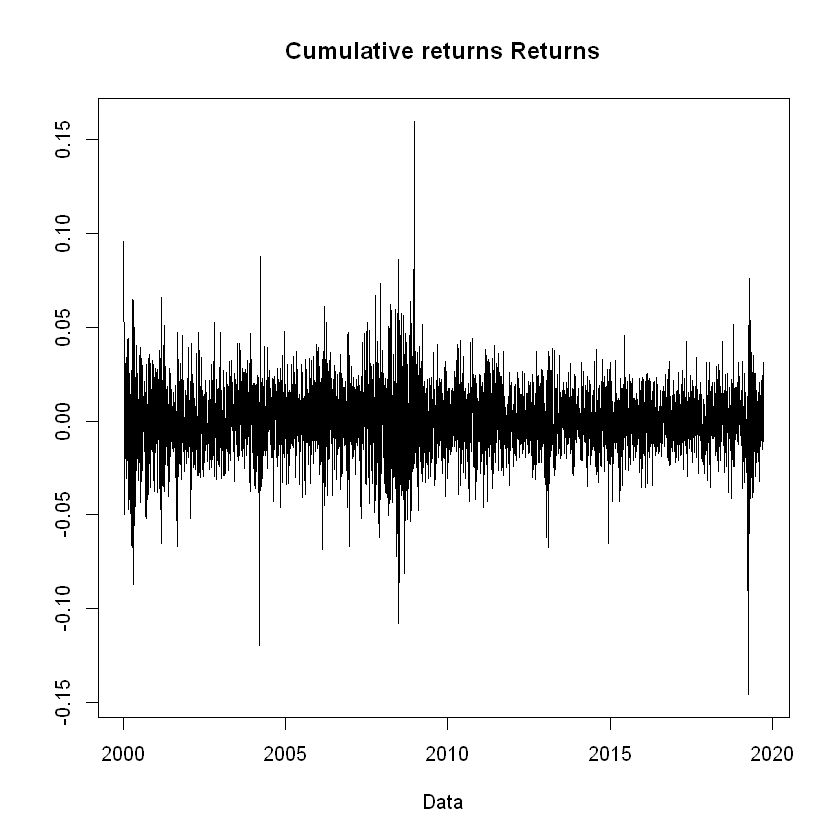

In [8]:
# Market or Nifty returns
plot(Data$Date, Data$Nifty , xlab="Data", ylab = "", main = "Cumulative returns Returns", type = 'l')

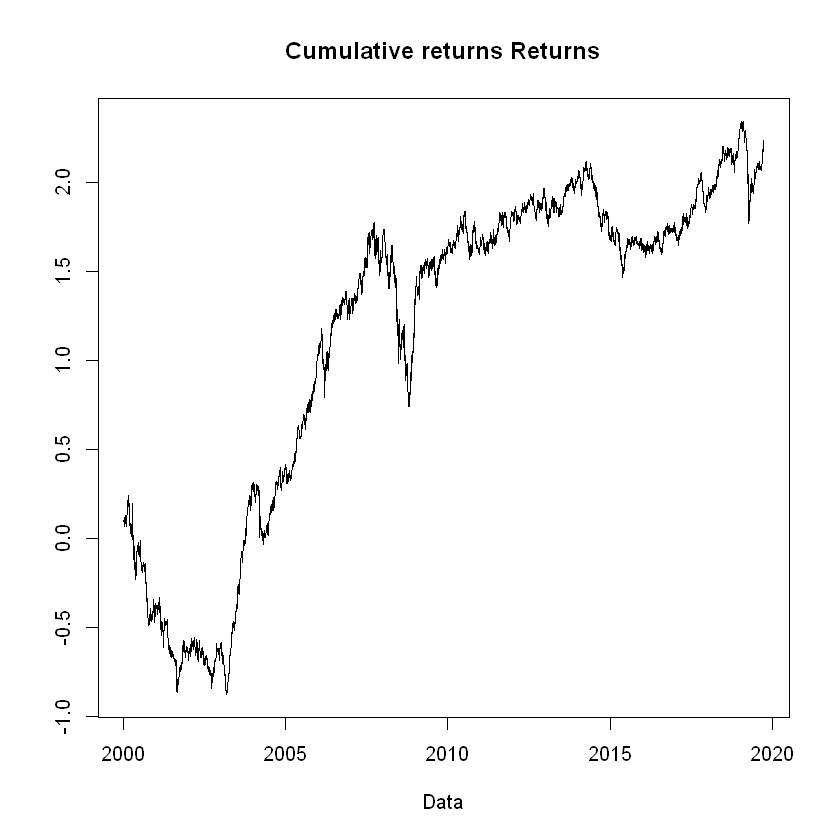

In [9]:
#Cumulative market returns
Data$Cum_Ret_Nifty = cumsum(Data$Nifty)
plot(Data$Date, Data$Cum_Ret_Nifty , xlab="Data", ylab = "", main = "Cumulative returns Returns", type = 'l')

### Basic Properties of data

In [10]:
summary(Data$ABC)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.9273627 -0.0090724  0.0001761  0.0003167  0.0100360  0.1108470 

In [11]:
summary(Data$Nifty)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.1458446 -0.0096267  0.0005979  0.0004322  0.0107338  0.1597033 

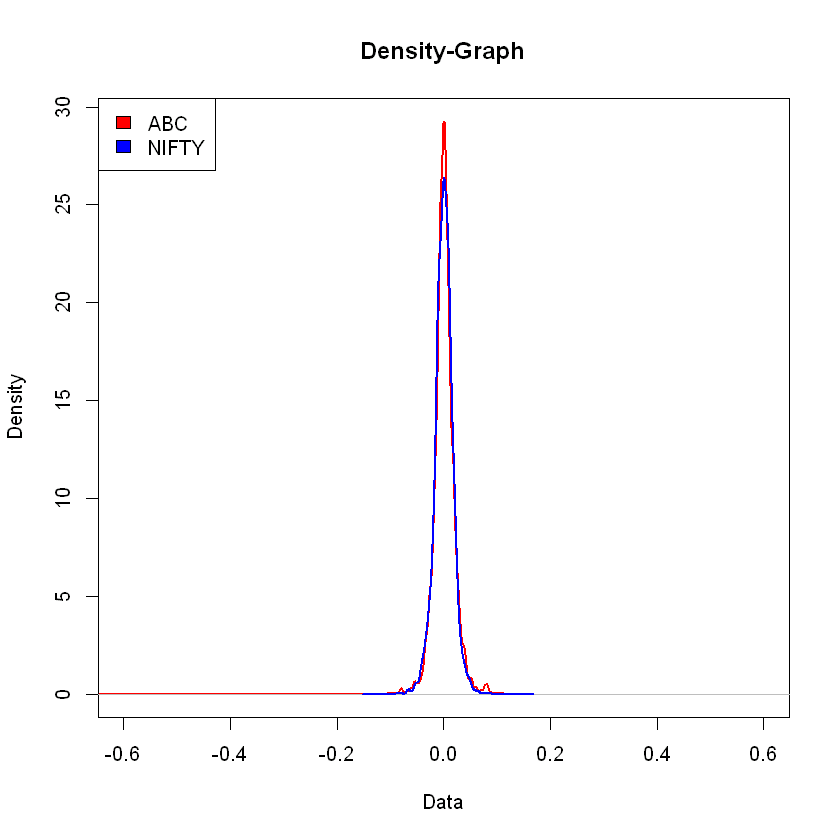

In [12]:
plot(density(Data$ABC), main= "Density-Graph", xlab = "Data", col = 'red', lwd = 2, lty =1, xlim =c(-0.6,0.6))
lines(density(Data$Nifty), col ="blue", lwd = 2)
legend("topleft",c("ABC", "NIFTY"), fill = c("red","blue"))
## ABS returns are skewed towards the left as we can see in the figure meanwhile NIFTY returns are Normal

### Normality and Stationerity of the data

Stationerity Refers to change of mean/ variance of the data w.r.t time

In [13]:
skewness(Data$ABC)
skewness(Data$Nifty)

[1] -11.99669

[1] -0.1775945

In [14]:
agostino.test(Data$ABC)
agostino.test(Data$Nifty)


	D'Agostino skewness test

data:  Data$ABC
skew = -11.997, z = -81.159, p-value < 2.2e-16
alternative hypothesis: data have a skewness



	D'Agostino skewness test

data:  Data$Nifty
skew = -0.17759, z = -5.17203, p-value = 2.316e-07
alternative hypothesis: data have a skewness


In [15]:
kurtosis(Data$ABC)
kurtosis(Data$Nifty)

[1] 415.1945

[1] 7.319551

In [16]:
anscombe.test(Data$ABC)
anscombe.test(Data$Nifty)


	Anscombe-Glynn kurtosis test

data:  Data$ABC
kurt = 415.195, z = 50.333, p-value < 2.2e-16
alternative hypothesis: kurtosis is not equal to 3



	Anscombe-Glynn kurtosis test

data:  Data$Nifty
kurt = 7.3196, z = 22.5579, p-value < 2.2e-16
alternative hypothesis: kurtosis is not equal to 3


In [17]:
jarque.test(Data$ABC)
jarque.test(Data$Nifty)


	Jarque-Bera Normality Test

data:  Data$ABC
JB = 36603480, p-value < 2.2e-16
alternative hypothesis: greater



	Jarque-Bera Normality Test

data:  Data$Nifty
JB = 4033.2, p-value < 2.2e-16
alternative hypothesis: greater


In [18]:
## Now doing Stationerity tests
library(urca)

In [19]:
# Here null hypotheisis is data is non-stationary
summary(ur.df(Data$ABC))
summary(ur.df(Data$Nifty))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92671 -0.00912  0.00013  0.00999  0.11103 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -1.02004    0.01970 -51.786   <2e-16 ***
z.diff.lag  0.02003    0.01392   1.439     0.15    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02488 on 5149 degrees of freedom
Multiple R-squared:  0.5002,	Adjusted R-squared:    0.5 
F-statistic:  2577 on 2 and 5149 DF,  p-value: < 2.2e-16


Value of test-statistic is: -51.7863 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.147411 -0.009582  0.000652  0.010714  0.158660 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.980741   0.019405  -50.54   <2e-16 ***
z.diff.lag  0.008194   0.013896    0.59    0.555    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01779 on 5149 degrees of freedom
Multiple R-squared:  0.4864,	Adjusted R-squared:  0.4862 
F-statistic:  2439 on 2 and 5149 DF,  p-value: < 2.2e-16


Value of test-statistic is: -50.5395 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [20]:
# Here null hypotheisis is data is non-stationary
summary(ur.pp(Data$ABC))
summary(ur.pp(Data$Nifty))


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92767 -0.00938 -0.00013  0.00971  0.11054 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.0003014  0.0003467   0.869    0.385
y.l1        -0.0003372  0.0139211  -0.024    0.981

Residual standard error: 0.02488 on 5150 degrees of freedom
Multiple R-squared:  1.139e-07,	Adjusted R-squared:  -0.0001941 
F-statistic: 0.0005867 on 1 and 5150 DF,  p-value: 0.9807


Value of test-statistic, type: Z-alpha  is: -4925.525 

         aux. Z statistics
Z-tau-mu            0.8703



################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.147539 -0.009986  0.000217  0.010282  0.158352 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.0004020  0.0002478   1.622   0.1048  
y.l1        0.0270940  0.0138908   1.951   0.0512 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01778 on 5150 degrees of freedom
Multiple R-squared:  0.0007382,	Adjusted R-squared:  0.0005442 
F-statistic: 3.804 on 1 and 5150 DF,  p-value: 0.05117


Value of test-statistic, type: Z-alpha  is: -5013.452 

         aux. Z statistics
Z-tau-mu            1.6221


In [21]:
# Here null hypotheisis is data is stationary
summary(ur.kpss(Data$ABC))
summary(ur.kpss(Data$Nifty))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 10 lags. 

Value of test-statistic is: 0.0887 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 10 lags. 

Value of test-statistic is: 0.1303 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [22]:
train= Data[Data$Date<= as.Date("2017-12-01") & year(Data$Date)> 2006,]
head(train)
tail(train)


Date,Price,ABC,Sensex,DividendAnnounced,Sentiment,Nifty,CUM_Ret,Cum_Ret_Nifty
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2007-01-01,153.20,-0.018577835,0.020609571,0,-0.054241830,0.002635723,-0.7866741,1.283683
2007-01-02,158.65,0.035574413,0.023273919,0,0.008467111,0.010307882,-0.7790851,1.293991
2007-01-03,156.10,-0.016073117,-0.006464859,0,0.004034366,-0.010663054,-0.7826359,1.283328
2007-01-04,157.05,0.006085842,0.004787963,0,0.097575403,0.020007297,-0.7813131,1.303335
2007-01-05,159.00,0.012416428,-0.003839180,0,-0.056319409,0.003910649,-0.7785978,1.307246
2007-01-08,160.60,0.010062893,0.020390317,0,0.079457951,0.014303838,-0.7763698,1.321550


Date,Price,ABC,Sensex,DividendAnnounced,Sentiment,Nifty,CUM_Ret,Cum_Ret_Nifty
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-11-24,287.25,-0.024949084,-0.022417120,0,-0.001194387,-0.019017503,-0.6000139,1.892317
2017-11-27,277.15,-0.035161010,-0.022524564,0,-0.059760413,-0.028207524,-0.6140778,1.864110
2017-11-28,273.45,-0.013350171,0.002833000,0,-0.044380771,0.008668805,-0.6192300,1.872778
2017-11-29,268.50,-0.018102030,-0.005073623,0,0.050690359,0.004191729,-0.6261227,1.876970
2017-11-30,270.05,0.005772812,0.013452686,0,-0.016352190,0.001435196,-0.6239644,1.878405
2017-12-01,265.20,-0.017959637,-0.021856172,0,-0.012042034,-0.011454561,-0.6307178,1.866951


In [23]:
dim(train)

[1] 2850    9

In [24]:
test = Data[Data$Date > as.Date("2017-12-01"),]
head(test)
tail(test)
dim(test)

Date,Price,ABC,Sensex,DividendAnnounced,Sentiment,Nifty,CUM_Ret,Cum_Ret_Nifty
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-12-04,274.70,0.035822021,0.021541330,0,0.039150988,0.008118141,-0.6174894,1.875069
2017-12-05,281.60,0.025118311,0.003786537,0,0.021276597,-0.005825725,-0.6078814,1.869243
2017-12-06,282.55,0.003373580,0.008529446,0,0.000310532,-0.001443591,-0.6065585,1.867800
2017-12-07,286.35,0.013448947,-0.010889448,0,0.025279343,-0.006046919,-0.6012671,1.861753
2017-12-08,288.45,0.007333683,-0.013339724,0,-0.009402877,-0.008137000,-0.5983430,1.853616
2017-12-11,288.25,-0.000693361,-0.005281850,0,-0.066309074,-0.005774682,-0.5986215,1.847841


Date,Price,ABC,Sensex,DividendAnnounced,Sentiment,Nifty,CUM_Ret,Cum_Ret_Nifty
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-09-25,184.95,0.005436260,0.016924160,0,-0.049778358,0.024913576,-0.7424633,2.195402
2019-09-26,183.90,-0.005677210,0.000366372,0,-0.008365814,0.006269552,-0.7439254,2.201672
2019-09-27,183.35,-0.002990756,-0.002520168,0,-0.009011816,0.001843369,-0.7446912,2.203515
2019-09-30,181.80,-0.008453777,0.007423762,0,-0.057237310,0.031277553,-0.7468495,2.234793
2019-10-01,180.65,-0.006325633,0.006620676,0,-0.096255086,-0.006477505,-0.7484509,2.228315
2019-10-02,178.55,-0.011624689,-0.008218234,0,-0.027268226,-0.001123344,-0.7513751,2.227192


[1] 478   9

## Modeling a simple Linear regression model

In [25]:
slr = lm(ABC ~ Nifty, data = train)
model = summary(slr)
model



Call:
lm(formula = ABC ~ Nifty, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50649 -0.00859 -0.00014  0.00893  0.08568 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0003458  0.0003638    0.95    0.342    
Nifty       0.3972054  0.0212795   18.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01942 on 2848 degrees of freedom
Multiple R-squared:  0.109,	Adjusted R-squared:  0.1087 
F-statistic: 348.4 on 1 and 2848 DF,  p-value: < 2.2e-16


Based on the Above output we can say
* Coeff of nifty(estimate) which means if market(Nifty) moves by 1% then ABC stock move by 0.39%. This relationship is statistically
significant at one percent level of significance
* The three (***) indicates at even 1% level of significance which is very high.
* Null hypothesis that nifty doesnt affect ABC, however the result obtained makes us reject null hypothesis because Nifty movement affects ABC
* Adjusted R-squared- Almost 10.87% of the overall movement in the ABC stock is affected by Nifty

Residual Diagnostics

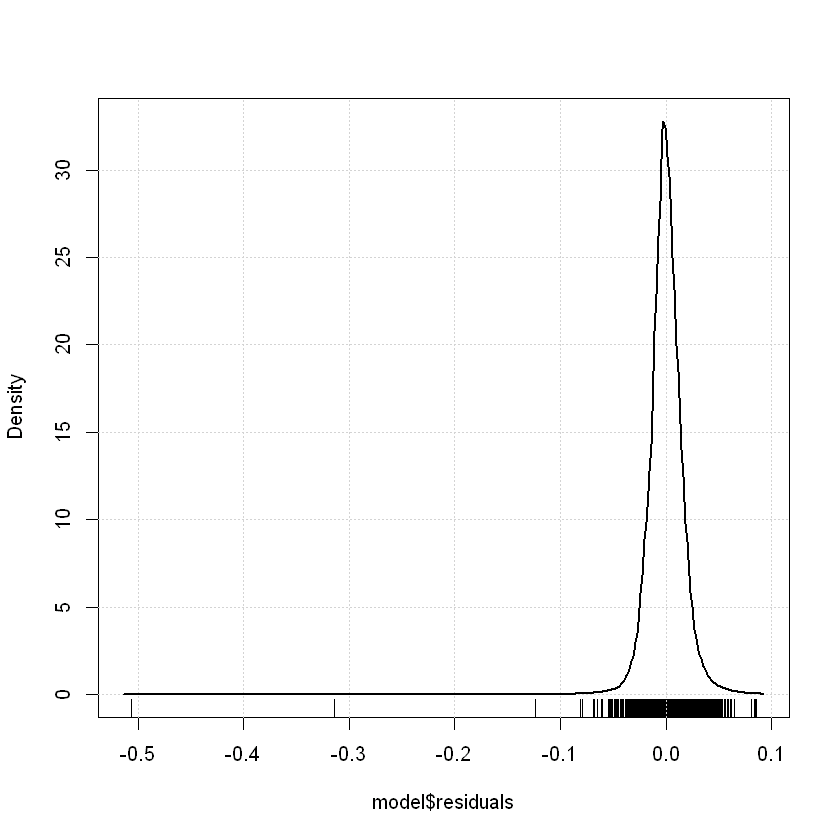

In [26]:
densityPlot(model$residuals)
## Left tail is long meaning plot is left skewed

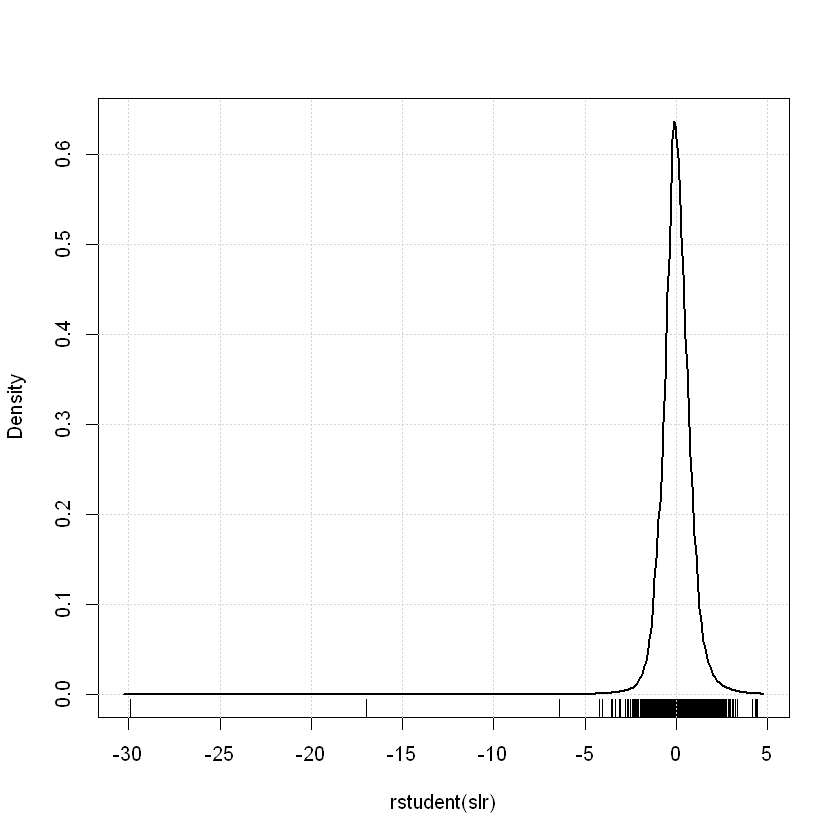

In [27]:
densityPlot(rstudent(slr))

[1]   72  152  197  817  962 1955 2145 2204 2286 2544

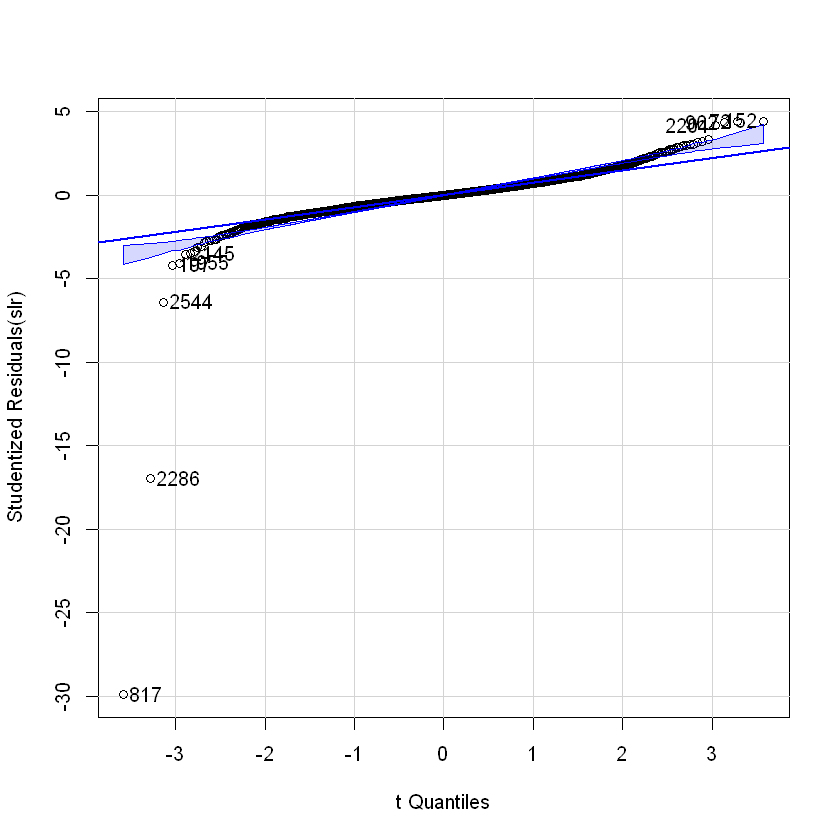

In [28]:
qqPlot(slr , id = list(n=10))

In [29]:
ncvTest(slr, studentize = F)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 7.326678, Df = 1, p = 0.0067938

In [30]:
ncvTest(slr, var.formula = ~Nifty)

Non-constant Variance Score Test 
Variance formula: ~ Nifty 
Chisquare = 7.326678, Df = 1, p = 0.0067938

### Autocorrelation

In [32]:
dwtest(slr, )

# If DW value is close to 2 then no autocorrelation  
# if close to zero then positive correlation and 
# if greater than 2 then negative autocorrelation


	Durbin-Watson test

data:  slr
DW = 2.0278, p-value = 0.7705
alternative hypothesis: true autocorrelation is greater than 0


In [33]:
bgtest(model)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  model
LM test = 0.57115, df = 1, p-value = 0.4498


In [34]:
bgtest(model , order = 4) ## At higher order lags we find some correletaion


	Breusch-Godfrey test for serial correlation of order up to 4

data:  model
LM test = 17.775, df = 4, p-value = 0.001365


### Roubust Standard Errors

In [35]:
coeftest(slr, vcov.=hccm)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.00034578 0.00036429  0.9492   0.3426    
Nifty       0.39720543 0.02222509 17.8719   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [37]:
coeftest(slr, vcov.=vcovHAC)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.00034578 0.00036398   0.950   0.3422    
Nifty       0.39720543 0.02218545  17.904   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [38]:
Pred =predict(slr, test)

ERROR: Error in legend("topright"): argument "legend" is missing, with no default


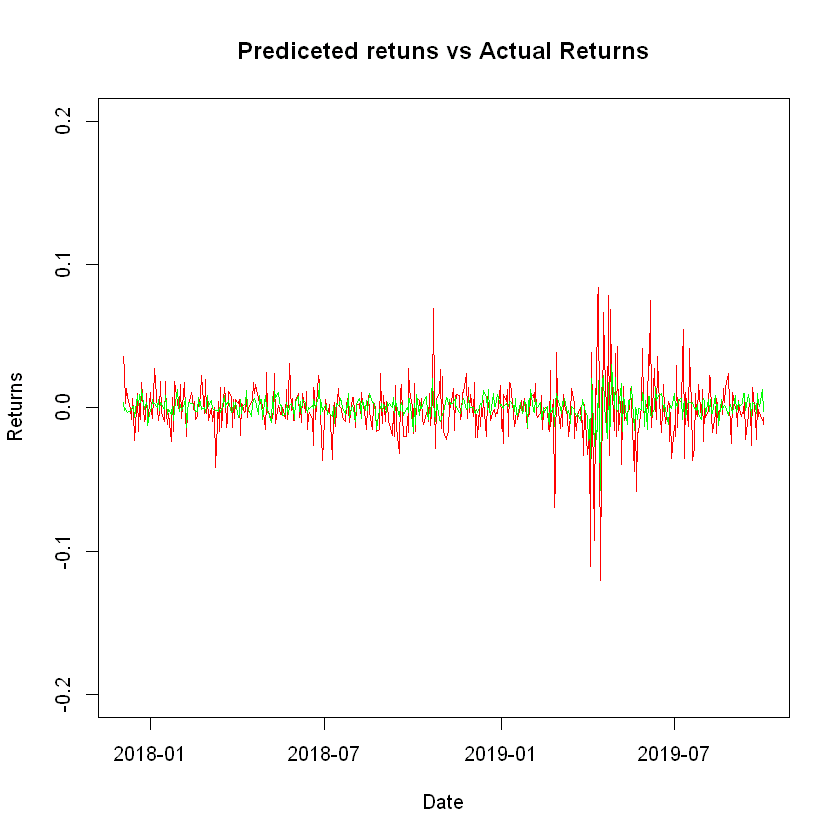

In [39]:
plot(test$Date, test$ABC, xlab ="Date", ylab = "Returns", main = "Prediceted retuns vs Actual Returns",ylim=c(-0.2,0.2), 
    pch = 20, col = "red", type = 'l')
lines(test$Date, Pred, lwd = 1,col = "green", type = "l")
legend("topright")

In [40]:
cor(test$ABC, Pred)

[1] 0.4378187

### Need cost and error functions to evaluate models

In [41]:
library(Metrics)
mse(test$ABC, Pred)


[1] 0.0003090856

In [42]:
rmse(test$ABC, Pred)

[1] 0.01758083

In [43]:
rae(test$ABC, Pred)

[1] 0.9476853

In [44]:
mae(test$ABC, Pred)

[1] 0.01202631

In [45]:
mape(test$ABC, Pred)

[1] Inf

In [46]:
smape(test$ABC, Pred)

[1] 1.416138

In [47]:
msle(test$ABC, Pred)

[1] 0.00031023

In [48]:
#rmsle
#rse
#bias
#rrse

## MultipleLinear Regression Model

In [49]:
Mlr =lm(ABC~ Sensex+ Sentiment+ Nifty+DividendAnnounced, data = train)
model = summary(Mlr)
model


Call:
lm(formula = ABC ~ Sensex + Sentiment + Nifty + DividendAnnounced, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43603 -0.00843  0.00016  0.00812  0.08422 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -9.793e-05  3.361e-04  -0.291   0.7708    
Sensex             5.791e-01  3.988e-02  14.522   <2e-16 ***
Sentiment          1.217e-01  6.211e-03  19.587   <2e-16 ***
Nifty             -2.646e-02  3.265e-02  -0.810   0.4178    
DividendAnnounced  3.757e-03  1.492e-03   2.519   0.0118 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01748 on 2845 degrees of freedom
Multiple R-squared:  0.2795,	Adjusted R-squared:  0.2784 
F-statistic: 275.8 on 4 and 2845 DF,  p-value: < 2.2e-16


### Multicollinearity
In above output we can see the Sensex, Nifty, Sentiment and DividendAnnounced are all the four variables which can have different level significance

In [50]:
cor(train[, c("ABC", "Sensex", "Nifty", "Sentiment")])

,ABC,Sensex,Nifty,Sentiment
ABC,1.0000000,0.4235848,0.33015781,0.36929214
Sensex,0.4235848,1.0000000,0.80965155,0.13914023
Nifty,0.3301578,0.8096516,1.00000000,0.09830017
Sentiment,0.3692921,0.1391402,0.09830017,1.00000000


### Variance Inflation Factor (Used to measure multicollinearity)
if number is around 1, if higher than 2 then moderate, and if higher than 5 then actually high

In [51]:
vif(Mlr)

Sensex         Sentiment             Nifty DividendAnnounced 
         2.938582          1.021159          2.907294          1.002868

In [52]:
Mlr = lm(ABC~Sensex+Sentiment+DividendAnnounced,data = train)
model= summary(Mlr)
model


Call:
lm(formula = ABC ~ Sensex + Sentiment + DividendAnnounced, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43584 -0.00844  0.00034  0.00818  0.08380 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -9.394e-05  3.361e-04  -0.280    0.780    
Sensex             5.530e-01  2.350e-02  23.531   <2e-16 ***
Sentiment          1.218e-01  6.209e-03  19.613   <2e-16 ***
DividendAnnounced  3.792e-03  1.491e-03   2.543    0.011 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01747 on 2846 degrees of freedom
Multiple R-squared:  0.2793,	Adjusted R-squared:  0.2785 
F-statistic: 367.6 on 3 and 2846 DF,  p-value: < 2.2e-16


In [54]:
Pred = predict(Mlr,  test)
cor(Pred ,test$ABC)

[1] 0.5771076

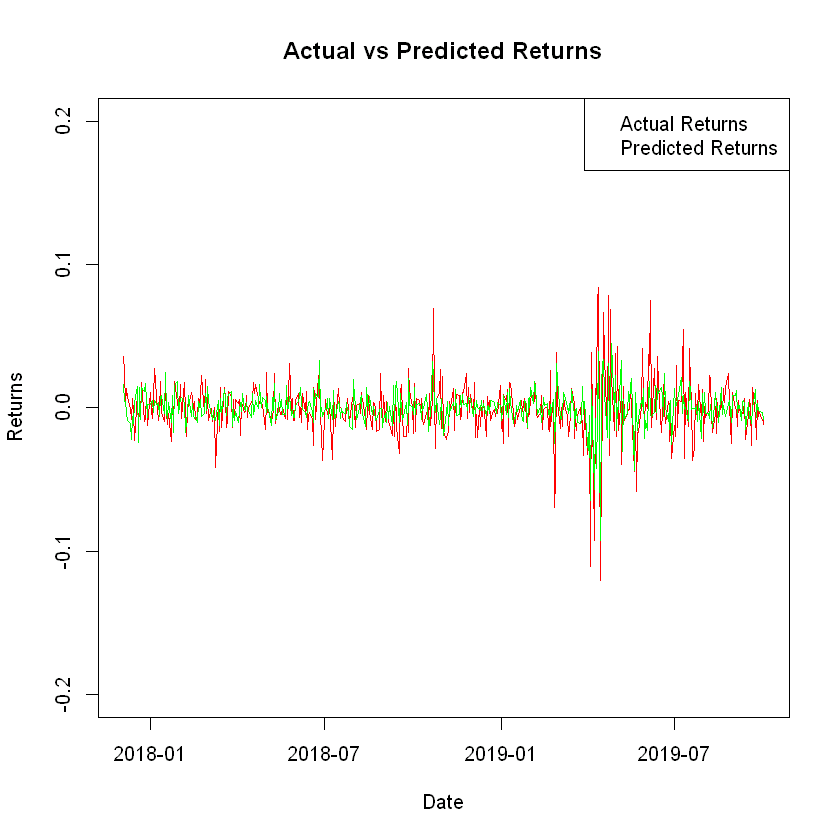

In [55]:
plot(test$Date, test$ABC, xlab ="Date", ylab = "Returns", main = "Actual vs Predicted Returns", 
        ylim = c(-0.2, 0.2), col ="red" , type = "l")
lines(test$Date, Pred, col ="green", type= "l")
legend("topright", c("Actual Returns", "Predicted Returns"))